In [ ]:
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch
from sklearn.preprocessing import MinMaxScaler
import numpy as np

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [846]:
def read_data(path):
    with open(path, 'r') as f:
        lines = f.readlines()
        pre_acc, post_acc, pruning_amount = [], [], []
        for line in lines[1:]:
            pruning, pre, _, post, _, _ = line.strip().split(',')
            pruning_amount.append(float(pruning))
            pre_acc.append(float(pre))
            post_acc.append(float(post))
        print(path, len(pruning_amount), len(pre_acc), len(post_acc))
        return pruning_amount, pre_acc, post_acc
    #pruning amount, pre_acc, pre_comp_time, post_acc, post_comp_time, model_size

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [847]:
def plot_data(pruning_amount, pre_acc, post_acc):
    plt.figure(figsize=(15, 5))
    plt.plot(pruning_amount, pre_acc, 'o-', label='Pre-fine-tuning accuracy', color='red')
    plt.plot(pruning_amount, post_acc, 'o-', label='Post-fine-tuning pruning accuracy', color='green')
    plt.xlabel('Pruning Amount')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [848]:
models_data = []

data_paths = [
    '../results/VGG11_results.csv',
    '../results/VGG13_results.csv',
    '../results/VGG16_results.csv',
    '../results/VGG19_results.csv',
    '../results/AlexNet_results.csv',
]

for data_path in data_paths:
    models_data.append(read_data(data_path))

../results/VGG11_results.csv 60 60 60
../results/VGG13_results.csv 60 60 60
../results/VGG16_results.csv 59 59 59
../results/VGG19_results.csv 60 60 60
../results/AlexNet_results.csv 60 60 60
Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [849]:
X, y = [], []

for pruning, pre_acc, post_acc in models_data:
    initial_index = pruning.index(0)
    initial_acc = pre_acc[initial_index]
    
    for p, pre, post in zip(pruning, pre_acc, post_acc):
        X.append([p, pre, initial_acc])
        y.append(post)

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [850]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [851]:
indices = torch.randperm(X.size(0))
X = X[indices]
y = y[indices]

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [852]:
X[10], y[10]

(tensor([ 0., 50., 50.]), tensor([51.8400]))

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [853]:
scaler_X = MinMaxScaler()
X = torch.tensor(scaler_X.fit_transform(X), dtype=torch.float32)

scaler_y = MinMaxScaler()
y = torch.tensor(scaler_y.fit_transform(y), dtype=torch.float32)

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [854]:
class LearnData(nn.Module):
    def __init__(self):
        super(LearnData, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(3, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
        )
    def forward(self, x):
        x = self.net(x)
        return torch.abs(x)

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [855]:
model = LearnData()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

model.to('mps')
X = X.to('mps')
y = y.to('mps')

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [856]:
torch.save(model, 'learn_data.pth')

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [857]:
train_size = int(len(X) * 0.8)
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]
print(f"Train Size: {len(X_train)}")
print(f"Test Size: {len(X_test)}")

Train Size: 239
Test Size: 60
Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [858]:
num_epochs = 1000

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [859]:
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if epoch%100 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [0/1000], Loss: 0.1935
Epoch [100/1000], Loss: 0.0119
Epoch [200/1000], Loss: 0.0050
Epoch [300/1000], Loss: 0.0034
Epoch [400/1000], Loss: 0.0026
Epoch [500/1000], Loss: 0.0023
Epoch [600/1000], Loss: 0.0022
Epoch [700/1000], Loss: 0.0021
Epoch [800/1000], Loss: 0.0020
Epoch [900/1000], Loss: 0.0020
Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [860]:
len(X_test), len(y_test)

(60, 60)

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [861]:
# Getting 30 random samples
import random
random.seed(42)

indices = random.sample(range(len(X_test)), (len(X_test)-10))
X_test_samples = X_test[indices]
y_test_samples = y_test[indices]

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [862]:
model.eval()
max_error = 0.0
errors = []

preds, actuals = [], []

with torch.no_grad():
    pred = model(X_test_samples)
    pred = scaler_y.inverse_transform(pred.cpu().numpy())
    y_30_actual = scaler_y.inverse_transform(y_test_samples.cpu().numpy())
    X_30_actal = scaler_X.inverse_transform(X_test_samples.cpu().numpy())
    for i in range(len(pred)):
        error = abs(float(((pred[i] - y_30_actual[i])).item()))
        if error >= max_error:
            max_error = error
        print(f"Predicted: {pred[i].item():.2f}% \t\t Actual: {y_30_actual[i].item():.2f}%, \t\t\t Error: {error:.2f}%, \t\tFor Pruning Amount: {X_30_actal[i][0]:.1f}%")
        preds.append(pred[i].item())
        actuals.append(y_30_actual[i].item())
        errors.append(error)

Predicted: 7.64% 		 Actual: 1.76%, 			 Error: 5.88%, 		For Pruning Amount: 46.0%
Predicted: 19.56% 		 Actual: 19.85%, 			 Error: 0.29%, 		For Pruning Amount: 33.0%
Predicted: 48.16% 		 Actual: 45.18%, 			 Error: 2.98%, 		For Pruning Amount: 16.0%
Predicted: 2.08% 		 Actual: 0.34%, 			 Error: 1.74%, 		For Pruning Amount: 57.0%
Predicted: 39.09% 		 Actual: 38.80%, 			 Error: 0.29%, 		For Pruning Amount: 21.0%
Predicted: 35.42% 		 Actual: 33.78%, 			 Error: 1.64%, 		For Pruning Amount: 32.0%
Predicted: 32.59% 		 Actual: 31.19%, 			 Error: 1.40%, 		For Pruning Amount: 28.0%
Predicted: 4.31% 		 Actual: 1.09%, 			 Error: 3.22%, 		For Pruning Amount: 50.0%
Predicted: 32.86% 		 Actual: 34.64%, 			 Error: 1.78%, 		For Pruning Amount: 31.0%
Predicted: 8.08% 		 Actual: 3.80%, 			 Error: 4.28%, 		For Pruning Amount: 42.0%
Predicted: 2.70% 		 Actual: 1.60%, 			 Error: 1.10%, 		For Pruning Amount: 48.0%
Predicted: 20.32% 		 Actual: 15.80%, 			 Error: 4.52%, 		For Pruning Amount: 36.0%
Predicted: 52.

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [863]:
print("Max Error:", max_error)
print("Mean Error:", np.mean(errors))

Max Error: 7.7454986572265625
Mean Error: 2.368402497768402
Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

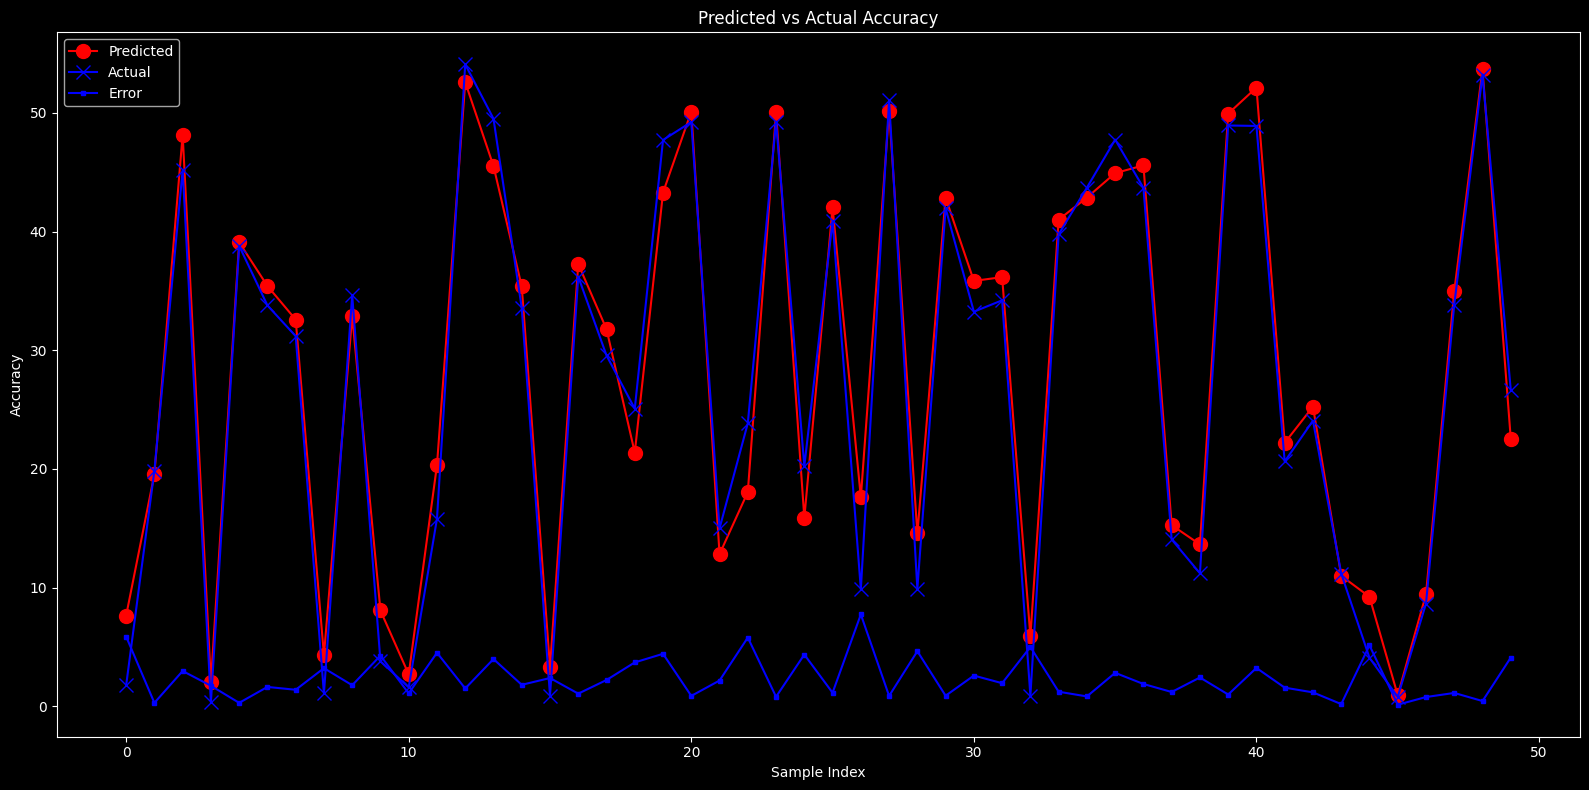

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [864]:
plt.figure(figsize=(16, 8))
plt.plot(preds, 'o-', label='Predicted', color='red', markersize=10)
plt.plot(actuals, 'x-', label='Actual', color='blue', markersize=10)
plt.plot(errors, 's-', label='Error', color='blue', markersize=3)
plt.xlabel('Sample Index')
plt.ylabel('Accuracy')
plt.title('Predicted vs Actual Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [865]:
def save_to_csv(preds, actuals, filename):
    with open(filename, 'w') as f:
        f.write('Predicted,Actual\n')
        for pred, actual in zip(preds, actuals):
            f.write(f'{pred},{actual}\n')
save_to_csv(preds, actuals, 'predictions.csv')

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [866]:
from pysr import PySRRegressor

model_sym = PySRRegressor(
    model_selection="best",  # or "accuracy" or "complexity"
    niterations=100,
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["exp", "log", "sin", "cos", "abs"],
    elementwise_loss="loss(x, y) = (x - y)^2",
    maxsize=30,
    verbosity=1,
)

model_sym.fit(X_test_samples.cpu().numpy(), pred)

/opt/homebrew/Caskroom/miniconda/base/envs/ML/lib/python3.10/site-packages/pysr/sr.py:2776: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          28.200182   
	1         0.628137                                       11.4651 / x0   
	2         0.457440                               log(x0) * -35.718956   
	3         0.764490                          63.8737 - (x0 * 66.06309)   
	4         0.000897                    abs((x0 * 66.682335) - 64.1251)   
	5         0.027683                 63.885788 - ((x2 + 65.40921) * x0)   
	6         0.028963            64.140816 - (x0 * (exp(x2) + 64.65485))   
	7         0.059049   64.637344 - (x0 * ((x2 / 0.12029391) + 63.4449))   
	8         0.255802  (((cos(x2) * 33.00824) + -90.96294) * x0) + 63...   
	9         0.031775  abs((x0 * ((cos(x2) * 34.980145) + -93.296684)...   
	10        0.022606  63.32308 + (x2 - (x0 * (93.20214 + (-35.90537 ...   
	11        1.219461  (cos((x2 + x0) - 0.9163515) * exp(4.587039 - x...   
	12        0.093757  abs(25.902876 - (cos((x2 + x0) - 0.9162715) * ...   
	13        0.017894  abs((cos((x0 + -0.91458404) + x2) * (x1 - exp(...   
	14        0.012865  abs(((exp(x1) - exp(4.607547 - x0)) * cos(x0 +...   
	15        0.166010  abs((cos((x2 + x0) - 0.8860845) * exp(4.640354...   
	16  >>>>  0.525934  abs(exp((cos(x2 + (x0 - 0.91285944)) * 3.72230...   
	17        0.042970  abs(exp((cos(sin(x2 - 0.9355855) + x0) * 3.797...   
	18        0.028394  abs((cos(x0 + x0) * -20.668478) - (cos(((x2 + ...   
	19        0.130240  abs((exp((cos(x0 + sin(x2 - 0.9430046)) * 3.79...   
	20        0.022797  abs((cos(x0 + x0) * -20.208586) - (cos(((x0 + ...   
	21        0.001601  abs(exp(0.003557794) - abs(exp((cos(x0 + sin(x...   
	22        0.015460  abs(((exp(3.7351668 - x0) * cos(((x2 + x0) * 1...   
	23        0.067051  sin(x2 / 0.20346154) + abs((4.505074 - (cos(x0...   
	24        0.045058  (abs((exp(3.9219096 - x0) * cos(1.2484028 - ((...   
	
	          loss  complexity  
	0   271.569240           1  
	1    77.319210           3  
	2    48.935463           4  
	3    22.782957           5  
	4    22.762520           6  
	5    22.141020           7  
	6    21.508955           8  
	7    20.275652           9  
	8    15.699346          10  
	9    15.208346          11  
	10   14.868408          12  
	11    4.391970          13  
	12    3.998908          14  
	13    3.858328          16  
	14    3.809010          17  
	15    3.226375          18  
	16    1.906798          19  
	17    1.826598          20  
	18    1.775462          21  
	19    1.558651          22  
	20    1.523521          23  
	21    1.516221          26  
	22    1.492961          27  
	23    1.396139          28  
	24    1.275828          30  
]

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [867]:
eq = model_sym.equations_.iloc[len(model_sym.equations_)-1].equation
print(f"Equation: {eq}")

Equation: (abs((exp(3.9219096 - x0) * cos(1.2484028 - ((x0 + x2) * 1.3535091))) - (4.505074 - (cos(x0 + x0) * 19.007563))) + sin(x2 / 0.20346154)) + -0.4682606
Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [868]:
equation_str = model_sym.get_best().__str__()
print(f"Best Equation: {equation_str}")

Best Equation: complexity                                                      19
loss                                                      1.906798
equation         abs(exp((cos(x2 + (x0 - 0.91285944)) * 3.72230...
score                                                     0.525934
sympy_format     Abs(exp(-x0 + cos(x0 + x2 - 1*0.91285944)*3.72...
lambda_format    PySRFunction(X=>Abs(exp(-x0 + cos(x0 + x2 - 1*...
Name: 16, dtype: object
Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

x0 -> pruning amount

x1 -> initial accuracy

x2 -> accuracy at pruning amount 0

In [869]:
print(model_sym.latex())

\left|{e^{- x_{0} + \cos{\left(x_{0} + x_{2} - 0.913 \right)} 3.72} - \cos{\left(x_{0} + x_{0} \right)} \left(-22.4\right)}\right|
Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

$\left|{e^{- x_{0} + \cos{\left(x_{0} + x_{2} - 0.913 \right)} 3.72} - \cos{\left(x_{0} + x_{0} \right)} \left(-22.4\right)}\right|$